# Regular Expression Basics

## 1. Introduction

In the previous course, we learned that regular expressions are a powerful way of building patterns to match text. In the first two missions of this Data Cleaning Advanced course, we're going to extend our knowledge about this extremely powerful tool that every data scientist should be familiar with.

As powerful as regular expressions are, they can be difficult to learn at first and the syntax can look visually intimidating. As a result, a lot of students end up disliking regular expressions and try to avoid using them, instead opting to write more cumbersome code.

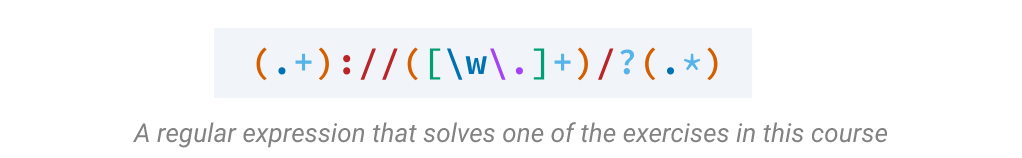

That said, learning (and loving!) regular expressions is something that is a worthwhile investment
- Once you understand how they work, complex operations with string data can be written a lot quicker, which will save you time.
- Regular expressions are often faster to execute than their manual equivalents.
- Regular expressions are supported in almost every modern programming language, as well as other places like command line utilities and databases. Understanding regular expressions gives you a powerful tool that you can use wherever you work with data.

We could probably fill a whole Dataquest course with the intricacies of regular expressions, but instead we're going to give you a two-mission tour of the main components.

One thing to keep in mind before we start: don't expect to remember all of the regular expression syntax. The most important thing is to understand the core principles, what is possible, and where to look up the details. This will mean you can quickly jog your memory whenever you need regular expressions.

With that in mind, don't be put off if some things in these missions don't stick in your memory. As long as you are able to write and understand regular expressions with the help of documentation and/or other reference guides, you have all the skills you need to excel.

We'll be learning regular expressions while performing analysis on a dataset of submissions to popular technology site Hacker News.

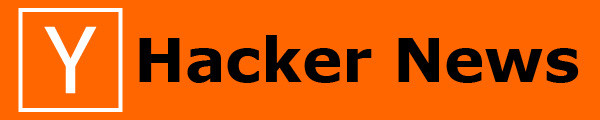

Hacker News is a site started by the startup incubator Y Combinator, where user-submitted stories (known as "stories") are voted and commented upon, similar to reddit. Hacker News is extremely popular in technology and startup circles; stories that make it to the top of Hacker News' listings can get hundreds of thousands of visitors.

The dataset we will be working with is based off this CSV of Hacker News stories from September 2015 to September 2016. The columns in the dataset are explained below:

- id: The unique identifier from Hacker News for the story
- title: The title of the story
- url: The URL that the stories links to, if the story has a URL
- num_points: The number of points the story acquired, calculated as the total number of upvotes minus the total number of downvotes
- num_comments: The number of comments that were made on the story
- author: The username of the person who submitted the story
- created_at: The date and time at which the story was submitted

For teaching purposes, we have reduced the dataset from the almost 300,000 rows in its original form to approximately 20,000 rows by removing all submissions that did not receive any comments, and then randomly sampling from the remaining submissions. You can download the modified dataset using the dataset preview tool.

Let's start by reading our Hacker News dataset into a pandas dataframe.



In [1]:
# Import the pandas library
import pandas as pd

In [2]:
# Read in file
hn = pd.read_csv('hacker_news.csv')

In [3]:
hn.head(5)

,id,title,url,num_points,num_comments,author,created_at
0,12224879,Interactive Dynamic Video,http://www.interactivedynamicvideo.com/,386,52,ne0phyte,8/4/2016 11:52
1,11964716,Florida DJs May Face Felony for April Fools' W...,http://www.thewire.com/entertainment/2013/04/f...,2,1,vezycash,6/23/2016 22:20
2,11919867,Technology ventures: From Idea to Enterprise,https://www.amazon.com/Technology-Ventures-Ent...,3,1,hswarna,6/17/2016 0:01
3,10301696,Note by Note: The Making of Steinway L1037 (2007),http://www.nytimes.com/2007/11/07/movies/07ste...,8,2,walterbell,9/30/2015 4:12
4,10482257,Title II kills investment? Comcast and other I...,http://arstechnica.com/business/2015/10/comcas...,53,22,Deinos,10/31/2015 9:48


When working with regular expressions, we use the term pattern to describe a regular expression that we've written. If the pattern is found within the string we're searching, we say that it has matched.

As we previously learned, letters and numbers represent themselves in regular expressions. If we wanted to find the string `"and"` within another string, the regex pattern for that is simply `and`:
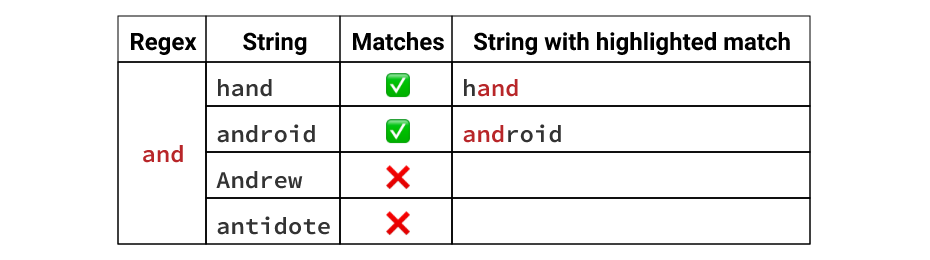



In the third example above, the pattern `and` does not match `Andrew` because even though `a` and `A` are the same letter, the two characters are unique.

We previously used regular expressions with pandas, but Python also has a built-in module for regular expressions: The `re` module. This module contains a number of different functions and classes for working with regular expressions. One of the most useful functions from the `re` module is the `re.search()` function, which takes two required arguments:
- The regex pattern
- The string we want to search that pattern for


In [4]:
import re

m = re.search("and", "hand")
print(m)

<re.Match object; span=(1, 4), match='and'>
